In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, len(x)+1)/n
    return x,y

In [4]:
sellers_data = pd.read_csv('../input/olist_sellers_dataset.csv')
product_cat = pd.read_csv('../input/product_category_name_translation.csv')
orders_dataset = pd.read_csv('../input/olist_orders_dataset.csv')
order_items_dataset = pd.read_csv('../input/olist_order_items_dataset.csv')
customers_dataset = pd.read_csv('../input/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('../input/olist_geolocation_dataset.csv')
order_payments_dataset = pd.read_csv('../input/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('../input/olist_order_reviews_dataset.csv')
products_dataset = pd.read_csv('../input/olist_products_dataset.csv')




## Improve ETD accuracy

Improving ETD can be interpreted as:
    1. what is the states that has the lowest time delivery
    2. How does current ETD estimator reflects the true behaviour 

In [5]:
df_all = pd.merge(orders_dataset, customers_dataset, on='customer_id')

In [6]:
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all.order_purchase_timestamp)

In [7]:
clean_data = df_all.dropna()

clean_data['order_approved_at'] = pd.to_datetime(clean_data.order_approved_at)
clean_data['order_delivered_carrier_date'] = pd.to_datetime(clean_data.order_delivered_carrier_date)
clean_data['order_delivered_customer_date'] = pd.to_datetime(clean_data.order_delivered_customer_date)
clean_data['order_estimated_delivery_date'] = pd.to_datetime(clean_data.order_estimated_delivery_date)

let's try to figure out how accuracy are the estimate time here. In order to verify it, we will use the delta, so that we can approximate the curve

In [23]:
clean_data['delta_ord_arrive_time'] = (clean_data.order_delivered_customer_date - clean_data.order_approved_at).dt.days
clean_data['delta_est_ord_arrive_time'] = (clean_data.order_estimated_delivery_date - clean_data.order_approved_at).dt.days
clean_data['delta_true_time_est_time'] = (clean_data.order_delivered_carrier_date - clean_data.order_estimated_delivery_date).dt.days
print('max time taken to deliver an item is {}, while max time for estimate delivery is {}'.\
      format(clean_data.delta_ord_arrive_time.max(), clean_data.delta_est_ord_arrive_time.max()))

max time taken to deliver an item is 208, while max time for estimate delivery is 153


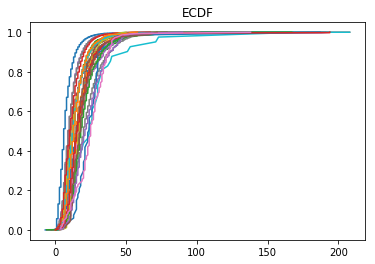

In [37]:
states = clean_data.customer_state.unique().tolist()
r = states[0]

for s in states:
    x, y = ecdf(clean_data[clean_data.customer_state == s].delta_ord_arrive_time.tolist())
    plt.plot(x,y)

# plt.legend(states)
plt.title('ECDF')
plt.show()

In [42]:
sum(clean_data.delta_true_time_est_time == 0)

136

In [38]:
import holidays

# holid = holidays()
clean_data.corr()

,customer_zip_code_prefix,delta_ord_arrive_time,delta_est_ord_arrive_time,delta_true_time_est_time
customer_zip_code_prefix,1.000000,0.268596,0.375444,-0.376472
delta_ord_arrive_time,0.268596,1.000000,0.381099,-0.225127
delta_est_ord_arrive_time,0.375444,0.381099,1.000000,-0.917720
delta_true_time_est_time,-0.376472,-0.225127,-0.917720,1.000000


let's try to figure out on which year it has most orders. Here is is clear that

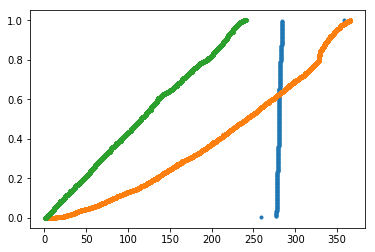

In [95]:
years = clean_data.order_purchase_timestamp.dt.year.unique().tolist()


orders_2018 = clean_data[clean_data.order_purchase_timestamp.dt.year == 2018]
orders_2017 = clean_data[clean_data.order_purchase_timestamp.dt.year == 2017]
orders_2016 = clean_data[clean_data.order_purchase_timestamp.dt.year == 2016]




# x_2017, y_2017 = ecdf(np.log(orders_2017.order_purchase_days_of_year.tolist()))
# x_2018, y_2018 = ecdf(np.log(orders_2018.order_purchase_days_of_year.tolist()))
# x_2016, y_2016 = ecdf(np.log(orders_2016.order_purchase_days_of_year.tolist()))

x_2017, y_2017 = ecdf(orders_2017.order_purchase_days_of_year.tolist())
x_2018, y_2018 = ecdf(orders_2018.order_purchase_days_of_year.tolist())
x_2016, y_2016 = ecdf(orders_2016.order_purchase_days_of_year.tolist())

plt.plot(x_2016,y_2016, marker='.', linestyle='none')
plt.plot(x_2017, y_2017, marker='.', linestyle='none')
plt.plot(x_2018,y_2018, marker='.', linestyle='none')

plt.show()


##  Pick better fulfillment plans, better meaning "faster" or "cheaper"


In [1]:
# code goes below
# find the min of time which takes to an item to arrive

## Improve conversion and maximize revenue by dynamically pricing premium delivery options for loyal customers

In [2]:
# code goes below